## About Dataset

The provided sales data represents a sample dataset of a car manufacturing and selling company. The dataset contains information about various aspects of sales transactions, including order details, quantities, prices, dates and geographical locations.

The dataset consists of 2,823 records, encompassing columns such as ORDERNUMBER, QUANTITYORDERED, PRICEEACH, ORDERLINENUMBER, SALES, ORDERDATE, STATUS, QTR_ID, MONTH_ID, YEAR_ID, PRODUCTLINE, MSRP, PRODUCTCODE, CUSTOMERNAME, PHONE, ADDRESSLINE1, ADDRESSLINE2, CITY, STATE, and POSTALCODE.

Exploratory data analysis (EDA) can reveal insights regarding the distribution of sales, product line performance, yearly and monthly sales trends, regional variations, and top customer sales. Visualizations and statistical measures can help identify patterns, trends, and potential areas for improvement or further investigation.

In [15]:
import numpy as np 
import pandas as pd 
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
df = pd.read_csv('sales_data_sample.csv', encoding='latin1')

## Checking Data

In [5]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


## Data Cleaning

In [8]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

<AxesSubplot: >

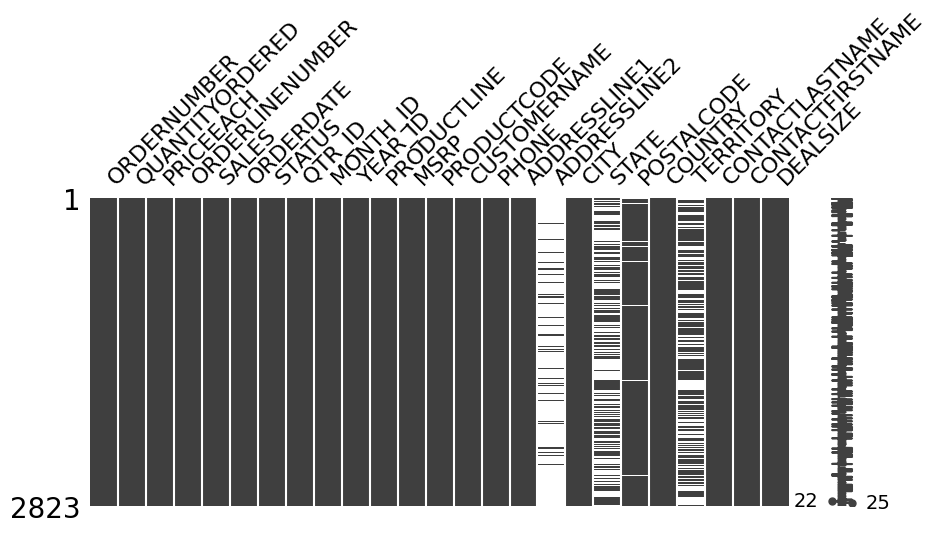

In [9]:
msno.matrix(df, figsize=(10,4))

In [10]:
sales = df.drop(columns=['TERRITORY','POSTALCODE','ADDRESSLINE2',
'PHONE','PRODUCTCODE','MSRP','CONTACTFIRSTNAME','CONTACTLASTNAME','QTR_ID','ORDERLINENUMBER'])

In [11]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERNUMBER      2823 non-null   int64  
 1   QUANTITYORDERED  2823 non-null   int64  
 2   PRICEEACH        2823 non-null   float64
 3   SALES            2823 non-null   float64
 4   ORDERDATE        2823 non-null   object 
 5   STATUS           2823 non-null   object 
 6   MONTH_ID         2823 non-null   int64  
 7   YEAR_ID          2823 non-null   int64  
 8   PRODUCTLINE      2823 non-null   object 
 9   CUSTOMERNAME     2823 non-null   object 
 10  ADDRESSLINE1     2823 non-null   object 
 11  CITY             2823 non-null   object 
 12  STATE            1337 non-null   object 
 13  COUNTRY          2823 non-null   object 
 14  DEALSIZE         2823 non-null   object 
dtypes: float64(2), int64(4), object(9)
memory usage: 330.9+ KB


In [12]:
sales = sales.rename({'ORDERNUMBER': 'OrderId',
              'QUANTITYORDERED' : 'Quantity',
              'PRICEEACH' : 'PriceEach',
              'SALES' : 'Sales',
              'ORDERDATE': 'OrderDate',
              'STATUS' : 'Status',
              'MONTH_ID' : 'Month',
              'YEAR_ID' : 'Year',
              'PRODUCTLINE' : 'ProductLine',
              'CUSTOMERNAME' : 'CustomerName',
              'ADDRESSLINE1' : 'Address',
              'CITY' : 'City',
              'STATE' : 'State',
              'COUNTRY' : 'Country',
              'DEALSIZE' : 'DealSize'
               },axis = 1)

In [13]:
sales['OrderDate'] = pd.to_datetime(sales['OrderDate'])

### Best Year of Sales

In [16]:
y = sales.groupby(['Year'])['Sales'].sum().reset_index()
y['Year'] = y['Year'].astype('str')
y1 = px.bar(y,x = 'Year', y = 'Sales',color = 'Year',text_auto = True,
            template="plotly_dark")
y1 = y1.update_layout(title={'text' : 'SALES BY YEAR',
                             'y':0.9,'x':0.5,'xanchor': 'center'})
y1 = y1.update_layout(xaxis_title='Year', yaxis_title='SALES (Millions)')
y1.show()
y['Year'] = y['Year'].astype('int')

In [17]:
r = y.set_index('Year')
round((r.loc[2004] - r.loc[2003]) / r.loc[2003] *100,2).to_frame()

,0
Sales,34.32


Percentage increase from financial year 2003 to 2004 is = 34.32 %

### Best Month of Sales

In [18]:
sales['M'] = sales['OrderDate'].dt.month_name()
ym = sales.groupby(['Month','Year','M'])['Sales'].sum().reset_index()
ym["Year/Month"] = ym['Year'].astype('str') + '-' +  ym['M']
ym['sort'] = ym['Year'].astype('str') + '-' + ym['Month'].astype('str')
ym['sort'] = pd.to_datetime(ym['sort'])
ym = ym.sort_values(by = 'sort')

In [19]:
ym = px.bar(ym,x = 'Year/Month', y = 'Sales',color = 'Year/Month',text_auto = True,
            template="plotly_dark",color_discrete_sequence=px.colors.sequential.Jet )
ym = ym.update_layout(title={'text' : 'SALES BY YEAR AND MONTH',
                             'y':0.9,'x':0.5,'xanchor': 'center'})
ym = ym.update_layout(xaxis_title='Year/Month', yaxis_title='SALES (Millions)')
ym.show()

We see that in both the fiscal year 2003 and 2004 the sales in month of November was the best.


Nov 2003 sales = 1.029 M

Nov 2004 sales = 1.089 M

In [20]:
yy = sales.groupby(['Year'])['Sales'].sum().reset_index()
nov_m = sales.query('Month == 11 and (Year in (2003,2004))').groupby(['Year'])['Sales'].sum().reset_index()
percent = yy.merge(nov_m, on = 'Year')
percent['Percent'] = round(percent['Sales_y'] / percent['Sales_x'] * 100,2)
percent[['Year','Percent']]

,Year,Percent
0,2003,29.28
1,2004,23.05


November 2003 is almost 30% of all sales in fiscal year 2003.

In [22]:
nov = sales.query('Month == 11 and (Year in (2003,2004))').groupby(['Year','DealSize'])['Sales'].sum().reset_index()
nov['DealSize'] = nov['DealSize'] + '-' + nov['Year'].astype('str')

In [23]:
nov = px.bar(nov,x = 'Sales', y = 'DealSize',color = 'DealSize',text_auto = True,
            template="plotly_dark",color_discrete_sequence=px.colors.sequential.Jet
            ,orientation='h')
nov = nov.update_layout(title={'text' : 'DEAL SIZE IN NOVEMBER',
                             'y':0.9,'x':0.5,'xanchor': 'center'})
nov = nov.update_layout(xaxis_title='SALES (Millions)', yaxis_title='Year')
nov.show()

In [24]:
prd = sales.query('Month == 11 and (Year in (2003,2004))').groupby(['Year','ProductLine'])['Sales'].sum().reset_index()
prd['ProductLine'] = prd['ProductLine'] + '-' + prd['Year'].astype('str')

In [25]:
prd1 = px.bar(prd,x = 'ProductLine', y = 'Sales',color = 'ProductLine',text_auto = True,
            template="plotly_dark",color_discrete_sequence=px.colors.sequential.Turbo )
prd1 = prd1.update_layout(title={'text' : 'PRODUCT LINE IN NOVEMBER',
                             'y':0.9,'x':0.5,'xanchor': 'center'})
prd1 = prd1.update_layout(xaxis_title='ProductLine', yaxis_title='SALES (Millions)')
prd1.show()

"Classic cars" were the best-selling product in November 2003 and November 2004.

### Best Country in total sales

In [26]:
cou = sales.groupby(['Year','Country'])['Sales'].sum().reset_index()

In [27]:
cou1 = px.treemap(cou,path=['Year','Country'],values='Sales',color = 'Country',
                 height = 600,width = 800,template="plotly",
                  color_discrete_sequence=px.colors.sequential.Inferno)
cou1 = cou1.update_layout(title={'text' : 'SALES BY COUNTRY AND YEAR',
                             'y':0.9,'x':0.5,'xanchor': 'center'})
cou1.show()

In [28]:
cou0304 = cou.merge(y, on = 'Year').query('Country == "USA" and Year in (2003,2004)')
cou0304['Percent'] = round(cou0304['Sales_x'] / cou0304['Sales_y'] * 100,2) 
cou0304.drop(columns=['Sales_x','Sales_y'])

,Year,Country,Percent
15,2003,USA,37.11
34,2004,USA,35.68


In both fiscal year 2003 and 2004, 1/3 of total sales belonged to the "USA"

In [29]:
st = sales.query('Country == "USA"').groupby(['Year','State'])['Sales'].sum().reset_index()

In [30]:
st1 = px.treemap(st,path=['Year','State'],values='Sales',color = 'State',
                 height = 600,width = 800,template="plotly",
                  color_discrete_sequence=px.colors.sequential.Inferno)
st1 = st1.update_layout(title={'text' : 'SALES BY STATE',
                             'y':0.9,'x':0.5,'xanchor': 'center'})
st1.show()

The best state from 2003 to 2005 was California.

### TOP 5 City in 2003 and 2004.

In [31]:
city = sales.groupby(['Year','City'])['Sales'].sum().reset_index()
city['Rank'] = city.groupby('Year')['Sales'].rank(method = 'dense',ascending = False).astype('int')  
city = city.query('Rank <= 5 ').sort_values(by = ['Year','Rank'])
y03 = city.query('Year == 2003 ')
y04 = city.query('Year == 2004 ')

In [32]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(
    rows=1, cols=2,shared_yaxes=True, subplot_titles=("SALES BY CITY 2003", "SALES BY CITY 2004")
)
fig.add_trace(go.Bar(x=y03['City'], y = y03['Sales'],name='2003',
                     marker=dict(color=y03['Sales'], coloraxis="coloraxis")), row=1, col=1)
fig.add_trace(go.Bar(x=y04['City'], y = y04['Sales'],name='2004',
                     marker=dict(color=y04['Sales'], coloraxis="coloraxis")), row=1, col=2)
fig.update_xaxes(title_text="City", row=1, col=1)
fig.update_xaxes(title_text="City", row=1, col=2)
fig = fig.update_layout(title={'text' : 'TOP 5 CITY BY SALES',
                             'y':0.9,'x':0.5,'xanchor': 'center'})
fig = fig.update_layout(template = 'plotly_dark')
fig.update_layout(coloraxis=dict(colorscale='solar'), showlegend=False)
fig.show()

### Best product in 2003 and 2004 in terms of sales ->

In [33]:
product = sales.groupby(['Year','ProductLine'])['Sales'].sum().reset_index()
product = product.sort_values(by = ['Sales'],ascending = True)
p03 = product.query('Year == 2003 ')
p04 = product.query('Year == 2004 ')

In [34]:
fig = make_subplots(
    rows=1, cols=2,shared_yaxes=True, subplot_titles=("SALES 2003", "SALES 2004")
)
fig.add_trace(go.Bar(x=p03['ProductLine'], y = p03['Sales'],name='2003',
                     marker=dict(color=p03['Sales'], coloraxis="coloraxis")), row=1, col=1)
fig.add_trace(go.Bar(x=p04['ProductLine'], y = p04['Sales'],name='2004',
                     marker=dict(color=p04['Sales'], coloraxis="coloraxis")), row=1, col=2)
fig.update_xaxes(title_text="PRODUCT", row=1, col=1)
fig.update_xaxes(title_text="PRODUCT", row=1, col=2)
fig = fig.update_layout(title={'text' : 'SALES BY PRODUCT',
                             'y':0.9,'x':0.5,'xanchor': 'center'})
fig = fig.update_layout(template = 'seaborn')
fig.update_layout(coloraxis=dict(colorscale='cividis'), showlegend=False)
fig.show()

"Classic Cars" were the most sold product in both the fiscal year 2003 and 2004